# Pacific Atlantic Water Flow


In [17]:
import matplotlib.pyplot as plt
from typing import List

## Warm Up: BFS, DFS

In [18]:
heights = [
    [1,2,2,0,5],
    [3,2,0,4,4],
    [2,4,0,0,1],
    [6,7,1,4,5],
    [5,1,1,2,4]
]

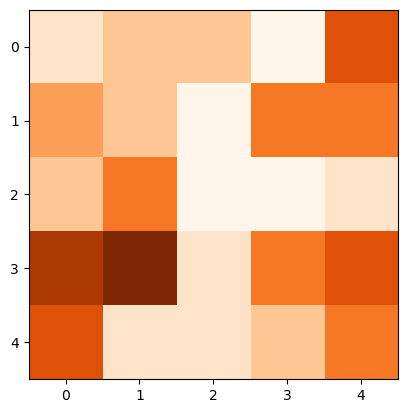

In [19]:
plt.imshow(heights, cmap='Oranges')

In [20]:
from collections import deque

In [21]:
def neighbors(j, i, m, n):
    if j > 0:     yield (j-1, i)
    if j < m-1:   yield (j+1, i)
    if i > 0:     yield (j, i-1)
    if i < n-1:   yield (j, i+1)

In [22]:
def bfs(arr):

    if not arr or not arr[0]: 
        return []

    m = len(arr)
    n = len(arr[0])

    q = deque([(0,0)])
    enqueued = [[False for _ in range(n)] for _ in range(m)]
    enqueued[0][0] = True

    while q:
        j, i = q.popleft()
        print(j,i)
        for j_n, i_n in neighbors(j,i,m,n):
            if (not enqueued[j_n][i_n]):
                enqueued[j_n][i_n] = True
                if arr[j_n][i_n] != 0:
                    q.append((j_n, i_n))


In [23]:
bfs(heights)

0 0
1 0
0 1
2 0
1 1
0 2
3 0
2 1
4 0
3 1
4 1
3 2
4 2
3 3
4 3
3 4
4 4
2 4
1 4
0 4
1 3


In [24]:
def dfs(arr):

    if not arr or not arr[0]: 
        return []

    m = len(arr)
    n = len(arr[0])

    visited = [[False for _ in range(n)] for _ in range(m)]

    def recurse(j, i):
        visited[j][i] = True
        print(j,i)
        for j_n, i_n in neighbors(j,i,m,n):
            if not visited[j_n][i_n] and arr[j_n][i_n] !=0:
                recurse(j_n, i_n)

    recurse(0,0)

In [25]:
dfs(heights)

0 0
1 0
2 0
3 0
4 0
4 1
3 1
2 1
1 1
0 1
0 2
3 2
4 2
4 3
3 3
3 4
2 4
1 4
0 4
1 3
4 4


## Pacific Atlantic Water Flow - Solution

In [27]:
heights = [
    [1,2,2,3,5],
    [3,2,3,4,4],
    [2,4,5,3,1],
    [6,7,1,4,5],
    [5,1,1,2,4]
]

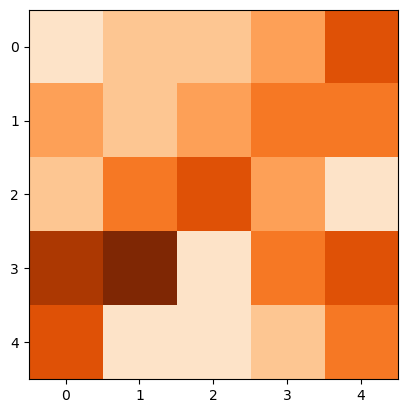

In [28]:
plt.imshow(heights, cmap='Oranges', vmin=0)

In [58]:
class Solution(object):
    def pacificAtlantic(self, arr):
        """
        :type heights: List[List[int]]
        :rtype: List[List[int]]
        """

        m = len(arr)
        n = len(arr[0])

        def neighbors(j, i, m, n):
            if j > 0:     yield (j-1, i)
            if j < m-1:   yield (j+1, i)
            if i > 0:     yield (j, i-1)
            if i < n-1:   yield (j, i+1)

        # pacific
        q = deque()
        enqueued = [[False for _ in range(n)] for _ in range(m)]
        pacific = [[False for _ in range(n)] for _ in range(m)]

        def enqueue(j,i):
            q.append((j,i))
            enqueued[j][i] = True

        for j in range(m):
            enqueue(j,0)
        for i in range(1,n):
            enqueue(0,i)

        while q:
            j, i = q.popleft()
            pacific[j][i] = True
            for j_n, i_n in neighbors(j,i,m,n):
                if (not enqueued[j_n][i_n]) and arr[j_n][i_n] >= arr[j][i]:
                    enqueue(j_n, i_n)

        # atlantic
        enqueued = [[False for _ in range(n)] for _ in range(m)]
        res = []

        for j in range(m):
            enqueue(j,n-1)
        for i in range(n-1):
            enqueue(m-1,i)

        while q:
            j, i = q.popleft()
            #atlantic[j][i] = True
            if pacific[j][i]:
                res.append((j,i))
            for j_n, i_n in neighbors(j,i,m,n):
                if (not enqueued[j_n][i_n]) and arr[j_n][i_n] >= arr[j][i]:
                    enqueue(j_n, i_n)

        return res



In [59]:
Solution().pacificAtlantic(heights)

[(0, 4), (1, 4), (4, 0), (1, 3), (3, 0), (3, 1), (2, 2)]